In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from tqdm import tqdm
from pycaret.classification import *
from zipfile import ZipFile
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import lmdb

In [2]:
trn_y_path = "../downloads/train_y_v0.1.0.csv"
trn_x_path = "../downloads/train_X_v0.1.0.zip"
tst_x_path = "../downloads/test_X_v0.1.0.zip"

In [52]:
zipf = ZipFile(trn_x_path, 'r')

In [4]:
# zipftest = ZipFile(tst_x_path, 'r')

In [5]:
# listtestfile = zipftest.namelist()[1:]

In [6]:
train_y = pd.read_csv(trn_y_path)

In [7]:
train_y.filename[1130]

'train_X1130.pkl'

In [56]:
slopes = []
for f in tqdm(train_y.filename):
    ts = pickle.loads(zipf.read("train_X/" + f))['t'].astype('timedelta64[s]').astype(int)
    slopes.append(ts[1] - ts[0])

  0%|          | 0/31839 [00:00<?, ?it/s]

100%|██████████| 31839/31839 [00:42<00:00, 754.85it/s]


(array([1.231e+03, 1.230e+02, 1.810e+02, 2.936e+04, 1.800e+01, 6.000e+00,
        5.660e+02, 0.000e+00, 3.000e+00, 1.620e+02]),
 array([1.0000e+00, 1.8870e+02, 3.7640e+02, 5.6410e+02, 7.5180e+02,
        9.3950e+02, 1.1272e+03, 1.3149e+03, 1.5026e+03, 1.6903e+03,
        1.8780e+03]),
 <BarContainer object of 10 artists>)

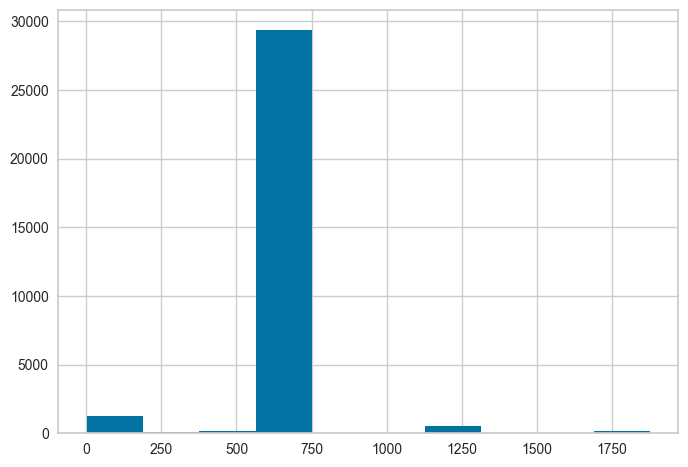

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
f_slopes = pd.Series(slopes)
f_slopes = f_slopes[f_slopes < 2000]
sns.histplot(pd.Series(f_slopes))

In [12]:
env = lmdb.open("./spec_feat.lmdb", readonly=True, lock=False, readahead=False)
filename = 'train_X/' + train_y.filename[3130]

with env.begin(write=False) as txn:
    key = filename.encode('utf-8')
    value = txn.get(key)
    if value is None:
        raise KeyError(f"Filename '{filename}' not found in the database.")
    sxx = pickle.loads(value)

In [16]:
sxx.shape

(129, 17)

<Axes: >

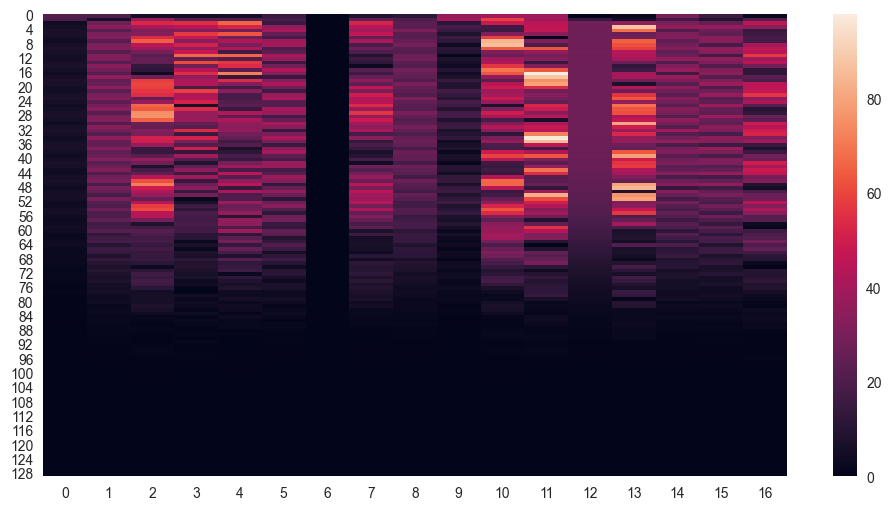

In [15]:
plt.figure(figsize=(12, 6))

# # Plot using pcolormesh for better performance with large datasets
# plt.pcolormesh(sxx, shading='gouraud', cmap='viridis')
# plt.colorbar(label='Magnitude')
# plt.title('Spectrogram')
# # plt.ylabel('Frequency [Hz]')
# # plt.xlabel('Time [sec]')
# plt.tight_layout()
# plt.show()
sns.heatmap(sxx)


In [35]:
# listtestfile[178350]

'test_X/test_X297620.pkl'

In [37]:
# len(pickle.loads(zipftest.read("test_X/test_X304021.pkl"))['v'])

439

In [17]:
t = pickle.loads(zipf.read('train_X/'+train_y.filename[1130]))['t'].astype('timedelta64[s]').astype(int)
v = pickle.loads(zipf.read('train_X/'+train_y.filename[1130]))['v']
# plt.plot(v)
# plt.show()

In [18]:
import numpy as np
import tsfel
import json
from scipy.interpolate import interp1d

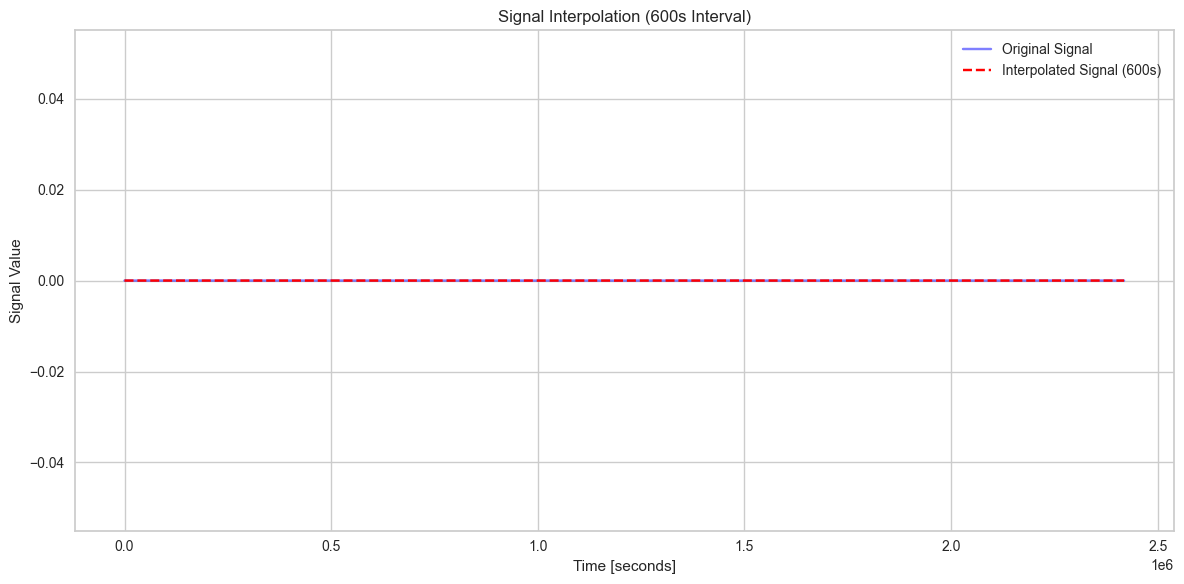

In [49]:
import pickle
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import signal

# Load the file
file_index = 7131
file_name = train_y.filename[file_index]  # Adjust based on your train_y structure
data = pickle.loads(zipf.read('train_X/' + file_name))

# Extract time (t) and signal (x)
t = data['t'].astype('timedelta64[s]').astype(int)  # Time in seconds
x = data['v']  # Signal values

# Define the new time grid (600 seconds interval)
start_time = t.min()
end_time = t.max()

# Create a time vector with 600-second intervals
new_t = np.arange(start_time, end_time + 1, 60)  # 600s interval

# Interpolate the signal to the new time grid
interpolation_function = interp1d(t, x, kind='cubic', fill_value="extrapolate")
new_x = interpolation_function(new_t)

# Plot original and interpolated signals
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Original Signal', color='blue', alpha=0.5)
plt.plot(new_t, new_x, label='Interpolated Signal (600s)', color='red', linestyle='dashed')

plt.xlabel('Time [seconds]')
plt.ylabel('Signal Value')
plt.title('Signal Interpolation (600s Interval)')
plt.legend()
plt.tight_layout()
plt.show()


In [50]:
t

array([      0,     588,    1195, ..., 2417288, 2417886, 2418490])

In [205]:
x = new_x
t = new_t

In [21]:
# Compute the sampling interval (average time difference between samples)
dt = np.mean(np.diff(t))  # Time difference in seconds

# Compute the sampling frequency
fs = 1.0 / dt  # Sampling frequency in Hz

print(f"Sampling Rate: {fs} Hz")

Sampling Rate: 0.0016671530746634896 Hz


In [31]:
x.shape

(4034,)

In [39]:
# Define spectrogram parameters
nperseg = 256     # Length of each segment
noverlap = 128    # Number of points to overlap between segments
nfft = 512        # Number of FFT points

# Compute the spectrogram
frequencies, times, Sxx = signal.spectrogram(
    x,
    fs=fs,
    window='hann',
    nperseg=nperseg,
    scaling='density',
    mode='magnitude'
)

In [40]:
Sxx.shape

(129, 17)

In [23]:
Sxx.shape

(129, 17)

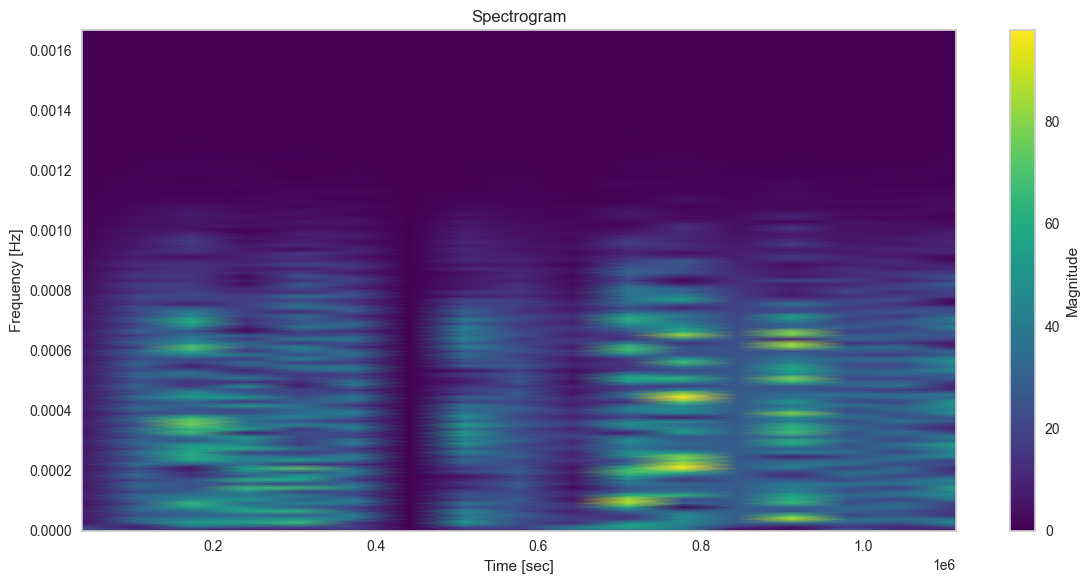

In [209]:
plt.figure(figsize=(12, 6))

# Plot using pcolormesh for better performance with large datasets
plt.pcolormesh(times, frequencies, Sxx, shading='gouraud', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()


In [147]:
# Compute the Discrete Fourier Transform of the signal
X = np.fft.fft(x)

# Compute the frequency bins
freqs = np.fft.fftfreq(len(x), d=1/fs)

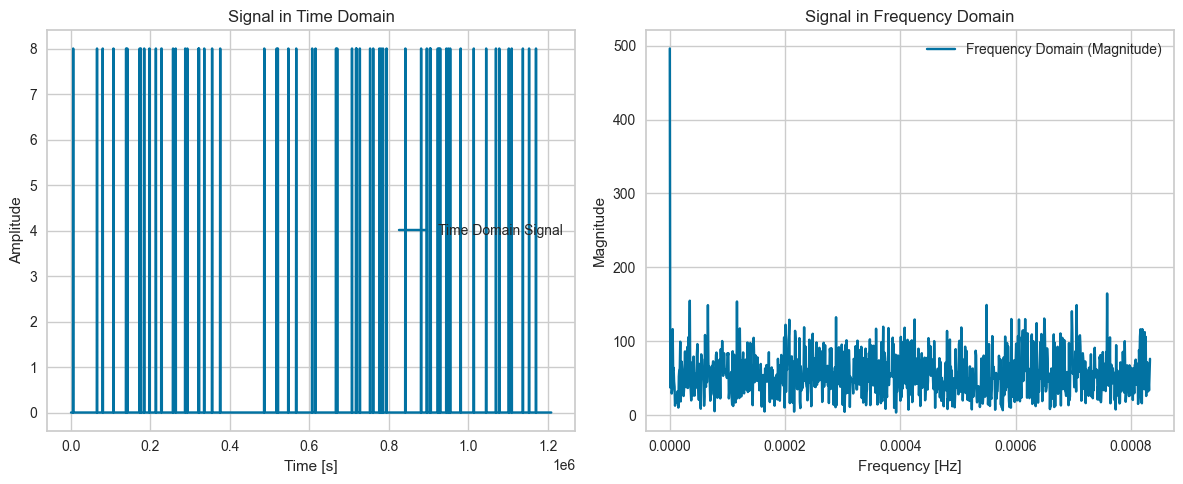

In [148]:
# Calculate the magnitude of the FFT
X_magnitude = np.abs(X)

# Only keep the positive half of frequencies and magnitudes
# (for real signals, the FFT is symmetric about zero frequency)
half_n = len(x) // 2
freqs_pos = freqs[:half_n]
X_magnitude_pos = X_magnitude[:half_n]

# Plot time-domain signal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, x, label='Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Signal in Time Domain')
plt.legend()
plt.grid(True)

# Plot frequency-domain signal
plt.subplot(1, 2, 2)
plt.plot(freqs_pos, X_magnitude_pos, label='Frequency Domain (Magnitude)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Signal in Frequency Domain')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [140]:
len(freqs_pos)

1009